## Load datasets from `ROOT` files using `uproot`

In [1]:
import uproot

Download datasets from Zenodo:

In [2]:
%%bash
mkdir -p data
wget -O data/ntuple_4mu_bkg.root "https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1"
wget -O data/ntuple_4mu_VV.root "https://zenodo.org/record/3901869/files/ntuple_4mu_VV.root?download=1"

--2024-05-08 17:51:00--  https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:3b::100:200, 2001:1458:d00:9::100:195, 2001:1458:d00:3a::100:33a, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:3b::100:200|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/3901869/files/ntuple_4mu_bkg.root [following]
--2024-05-08 17:51:05--  https://zenodo.org/records/3901869/files/ntuple_4mu_bkg.root
Reusing existing connection to [zenodo.org]:443.
HTTP request sent, awaiting response... 200 OK
Length: 8867265 (8.5M) [application/octet-stream]
Saving to: 'data/ntuple_4mu_bkg.root'

     0K .......... .......... .......... .......... ..........  0%  193K 45s
    50K .......... .......... .......... .......... ..........  1%  429K 32s
   100K .......... .......... .......... .......... ..........  1% 63.5M 21s
   150K .......... .......... .......... .......... ..........  2% 1.48

## Load `ROOT` files
Here we simply open two `ROOT` files using `uproot` and display the branch content of one of the trees.

In [6]:
import numpy as np
import h5py

# Define the name of the tree
treename = "HZZ4LeptonsAnalysisReduced"

# Define the filenames
filename = {
    "bkg": "data/ntuple_4mu_bkg.root",
    "VV": "data/ntuple_4mu_VV.root"
}

# Open the ROOT files
upfile = {
    "bkg": uproot.open(filename["bkg"]),
    "VV": uproot.open(filename["VV"])
}

# Print the structure of the background tree
print(upfile["bkg"][treename].show())


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
f_run                | int32_t                  | AsDtype('>i4')
f_lumi               | int32_t                  | AsDtype('>i4')
f_event              | int32_t                  | AsDtype('>i4')
f_weight             | float                    | AsDtype('>f4')
f_int_weight         | float                    | AsDtype('>f4')
f_pu_weight          | float                    | AsDtype('>f4')
f_eff_weight         | float                    | AsDtype('>f4')
f_lept1_pt           | float                    | AsDtype('>f4')
f_lept1_eta          | float                    | AsDtype('>f4')
f_lept1_phi          | float                    | AsDtype('>f4')
f_lept1_charge       | float                    | AsDtype('>f4')
f_lept1_pfx          | float                    | AsDtype('>f4')
f_lept1_sip          | float                    | AsDtype(

## Convert tree to `pandas` DataFrames
For convenience

In [7]:
import pandas as pd

# Define the branches of interest
branches = ["f_mass4l", "f_massjj"]

# Create empty dictionary to store DataFrames
df = {}

# Extract arrays for background and signal datasets
df["bkg"] = upfile["bkg"][treename].arrays(branches, library="pd")
df["VV"] = upfile["VV"][treename].arrays(branches, library="pd")

# Print the first entry of the background DataFrame
print(df["bkg"].iloc[:1])

# Print the shape of the background DataFrame
print(df["bkg"].shape)

# Print the first entry for f_mass4l and f_massjj in the background DataFrame
print(df["bkg"][branches].iloc[:1])

# Convert the background DataFrame back into an unstructured NumPy array
print(df["bkg"].values)
print(df["bkg"].values.shape)

# Get a boolean mask array for f_mass4l > 125
mask = df["bkg"]["f_mass4l"] > 125
print(mask)

# Filter f_mass4l using the boolean mask array
print(df["bkg"]["f_mass4l"][mask])


    f_mass4l  f_massjj
0  91.098129    -999.0
(58107, 2)
    f_mass4l  f_massjj
0  91.098129    -999.0
[[  91.09813  -999.      ]
 [ 201.84761  -999.      ]
 [  89.279076 -999.      ]
 ...
 [  90.129845 -999.      ]
 [ 250.97742  -999.      ]
 [ 229.47015  -999.      ]]
(58107, 2)
0        False
1         True
2        False
3         True
4         True
         ...  
58102    False
58103     True
58104    False
58105     True
58106     True
Name: f_mass4l, Length: 58107, dtype: bool
1        201.847610
3        586.597412
4        135.589798
5        734.903442
6        341.958466
            ...    
58097    225.355103
58098    214.074249
58103    252.845184
58105    250.977417
58106    229.470154
Name: f_mass4l, Length: 42219, dtype: float32


## Plotting in `matplotlib`

Visualize the dataset before using machine learning. Using `matplotlib` with `uproot`

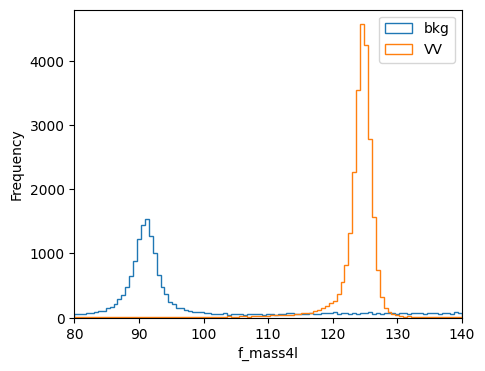

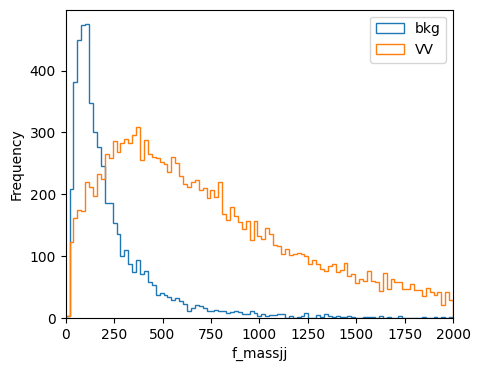

In [8]:
import matplotlib.pyplot as plt

# Define the variables of interest
VARS = ["f_mass4l", "f_massjj"]

# Plot histograms for f_mass4l
plt.figure(figsize=(5, 4), dpi=100)
bins = np.linspace(80, 140, 100)
df["bkg"][VARS[0]].plot.hist(bins=bins, alpha=1, label="bkg", histtype="step")
df["VV"][VARS[0]].plot.hist(bins=bins, alpha=1, label="VV", histtype="step")
plt.legend(loc="upper right")
plt.xlim(80, 140)
plt.xlabel(VARS[0])
plt.show()

# Plot histograms for f_massjj
plt.figure(figsize=(5, 4), dpi=100)
bins = np.linspace(0, 2000, 100)
df["bkg"][VARS[1]].plot.hist(bins=bins, alpha=1, label="bkg", histtype="step")
df["VV"][VARS[1]].plot.hist(bins=bins, alpha=1, label="VV", histtype="step")
plt.legend(loc="upper right")
plt.xlim(0, 2000)
plt.xlabel(VARS[1])
plt.show()
